In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
X,Y = load_iris(return_X_y=True)

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

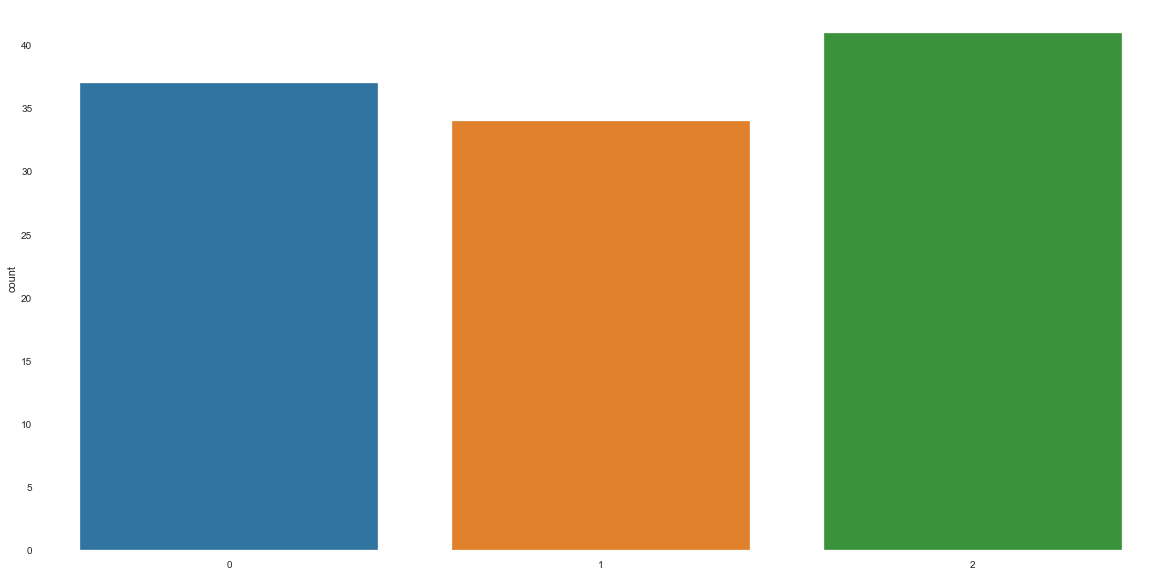

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(Y_train)

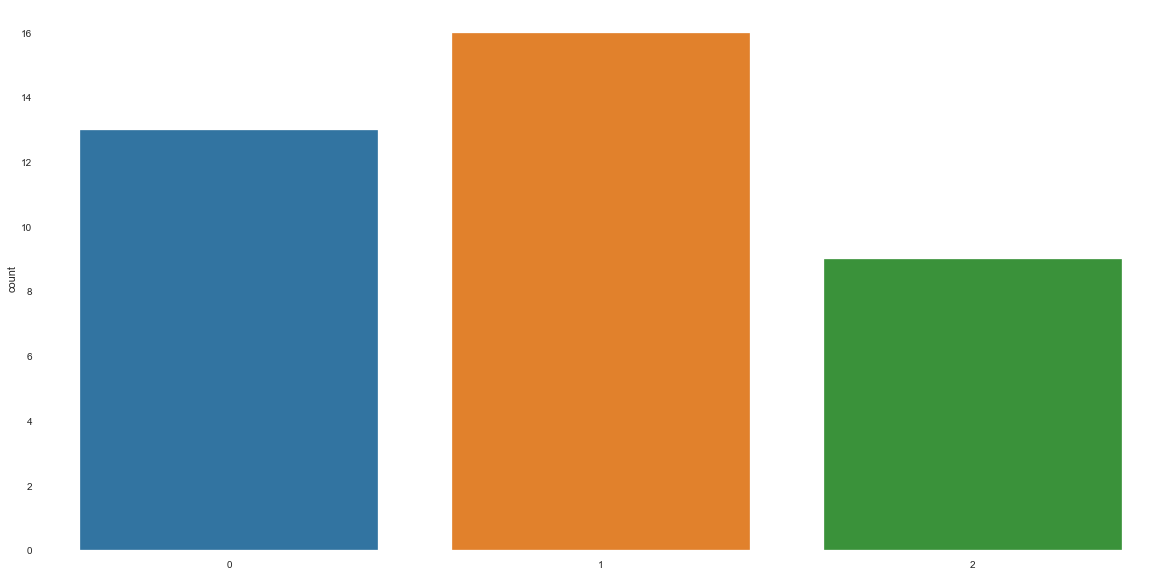

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(Y_test)

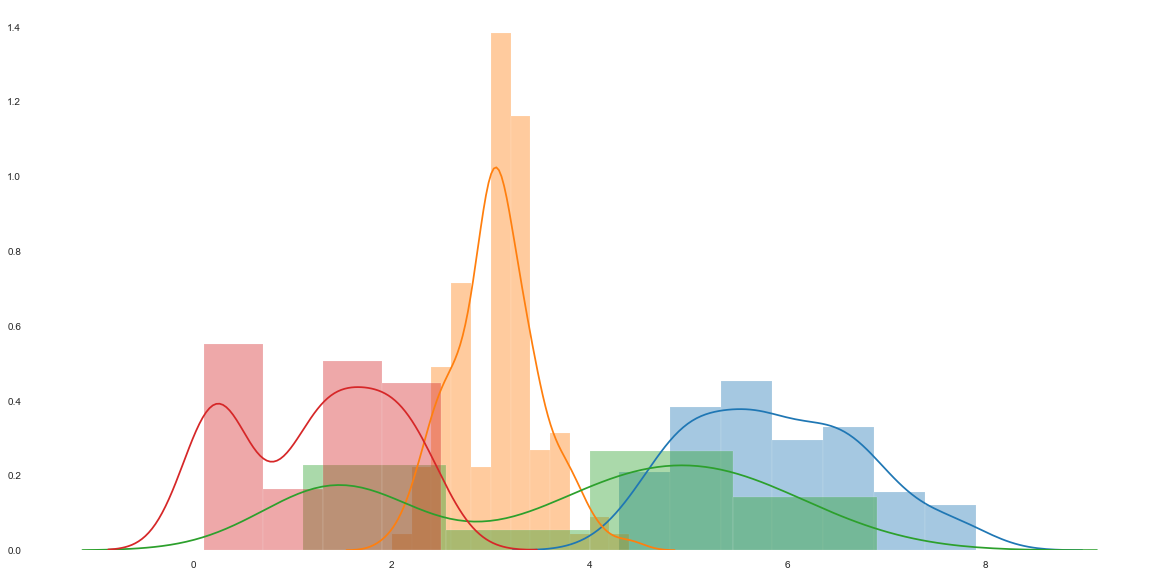

In [7]:
plt.figure(figsize=(20,10))
sns.distplot(X_train[:,0],kde=True,label="sepal-length") # Column zero
sns.distplot(X_train[:,1],kde=True,label="sepal-width") # column one
sns.distplot(X_train[:,2],kde=True,label="Petal-length") # column two
sns.distplot(X_train[:,3],kde=True,label="petal-width") # column three

Text(0, 0.5, 'sepal width')

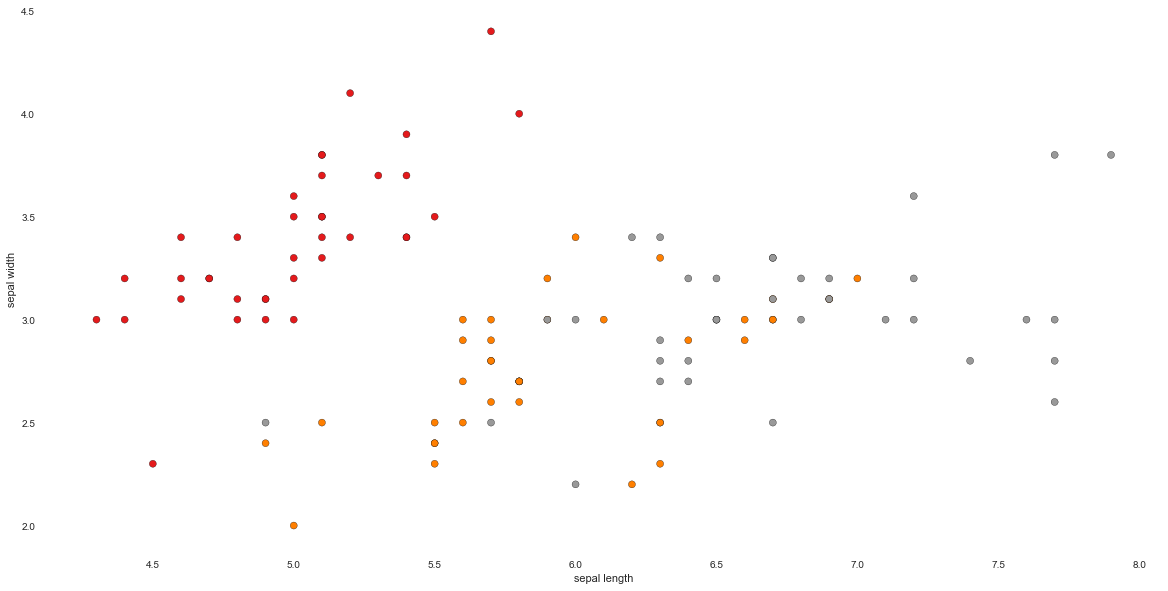

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

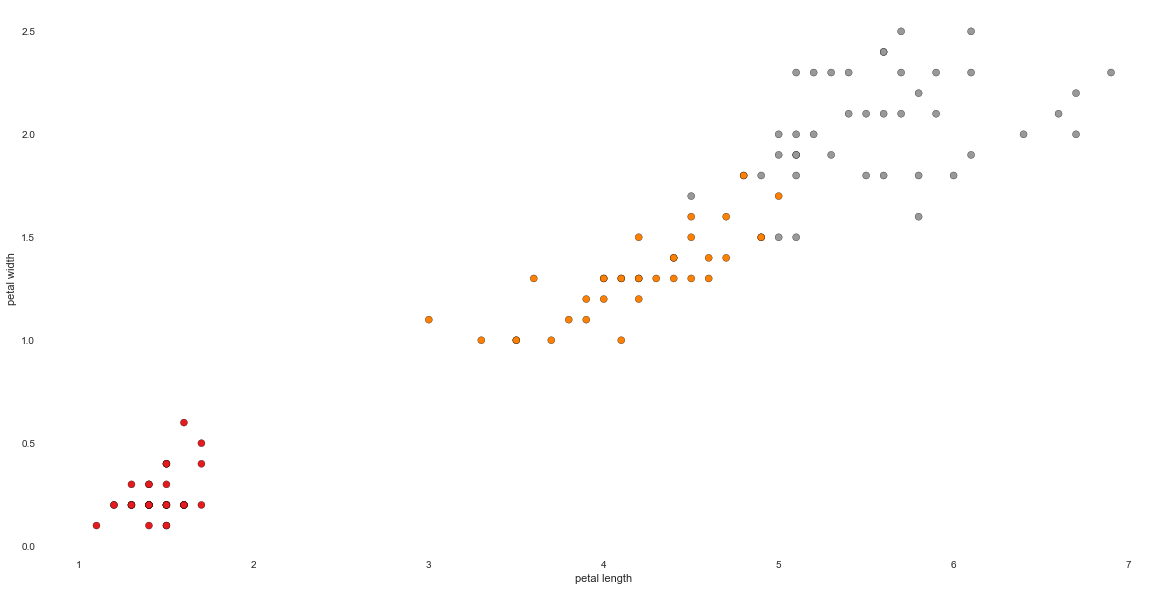

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(X_train[:,2],X_train[:,3],c=Y_train,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [10]:
X_train.shape

(112, 4)

In [11]:
from sklearn import preprocessing

In [12]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100)
X_train_transformer = quantile_transformer.fit_transform(X_train)
X_test_transformer = quantile_transformer.transform(X_test)

In [13]:
np.percentile(X_train[:,0],[0,25,50,75,100])

array([4.3, 5.1, 5.8, 6.5, 7.9])

In [14]:
np.percentile(X_train_transformer[:,0],[0,25,50,75,100])

array([0.        , 0.23737374, 0.51010101, 0.74242424, 1.        ])

In [15]:
np.percentile(X_test[:,0],[0,25,50,75,100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [16]:
np.percentile(X_test_transformer[:,0],[0,25,50,75,100])

array([0.01010101, 0.24873737, 0.47979798, 0.6031941 , 0.94144144])

In [17]:
PT_Johnson = preprocessing.PowerTransformer() # By default we have this method yeo-johnson

In [18]:
PT_Johnson.method

'yeo-johnson'

In [19]:
PT_Box_cox = preprocessing.PowerTransformer(method="box-cox") # By default we have this method Box-cox

In [22]:
PT_Box_cox.method

'box-cox'

In [23]:
rng = np.random.RandomState(304)

In [24]:
# n_quantiles is set to the training set size rather than the default value
QT_normal = preprocessing.QuantileTransformer(n_quantiles=500,
                                             output_distribution='normal',
                                             random_state=rng)

In [25]:
QT_normal.n_quantiles

500

In [27]:
N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30

In [28]:
size =(N_SAMPLES,1)

In [29]:
x_lognormal = rng.lognormal(size=size)

In [30]:
df=3
x_chisquare = rng.chisquare(df=df,size=size)

In [31]:
a=50
x_weibull = rng.weibull(a=a,size=size)

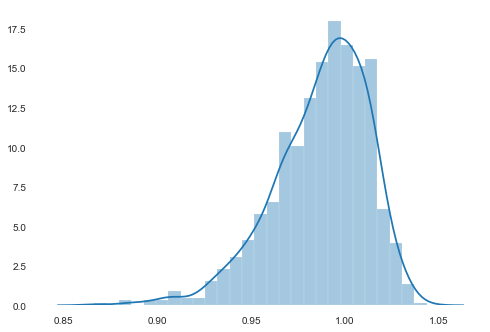

In [32]:
sns.distplot(x_weibull)

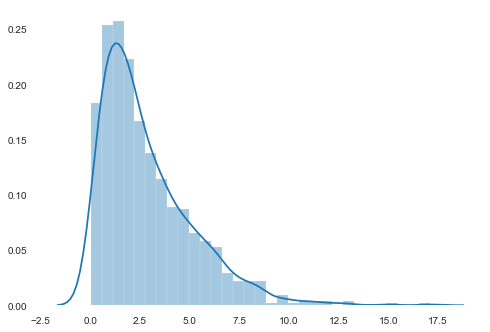

In [33]:
sns.distplot(x_chisquare)

In [34]:
# Gaussian distribution
loc = 100
x_gaussian = rng.normal(loc=loc,size=size)

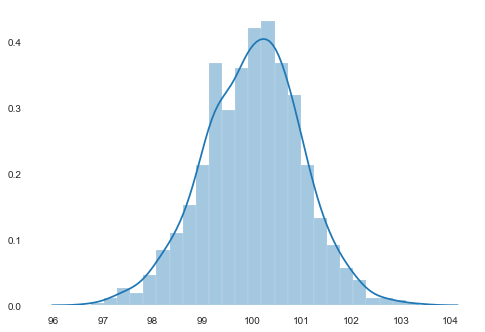

In [35]:
sns.distplot(x_gaussian)

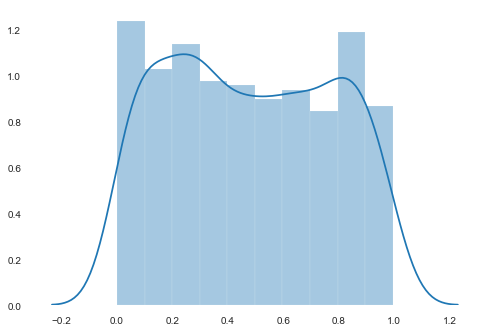

In [36]:
# uniform distribution
x_uniform = rng.uniform(low=0,high=1,size=size)
sns.distplot(x_uniform)

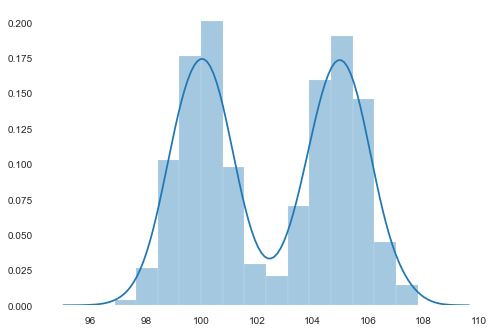

In [37]:
# binomial distribution
loc_a,loc_b = 100,105
X_a, X_b = rng.normal(loc=loc_a,size=size),rng.normal(loc=loc_b,size=size)
x_bimodel=np.concatenate([X_a,X_b],axis=0)
sns.distplot(x_bimodel)

In [38]:
# create plots
distributions = [
    ('Lognormal', x_lognormal),
    ('Chi-square', x_chisquare),
    ('weibull', x_weibull),
    ('Gaussian', x_gaussian),
    ('Uniform', x_uniform),
    ('Bimodel', x_bimodel)
]

colors = ['#D81B60','#0188FF','#FFC107',
         '#B7A2FF','#00ff00','#2EC5AC']

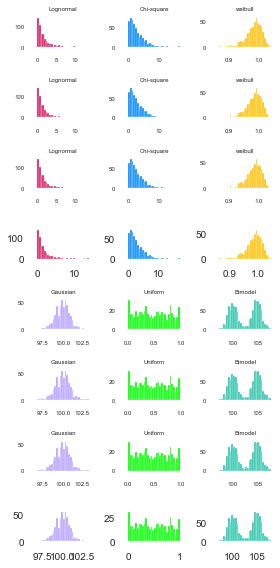

In [51]:
fig,axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_id = [(0,3,6,9),(1,4,7,10),(2,5,8,11),(12,15,18,21),
          (13,16,19,22),(14,17,20,23)]
axes_list = [(axes[i],axes[j],axes[k],axes[l])
            for (i,j,k,l) in axes_id]
             
             
             
for distribution,color,axes in zip(distributions,colors,axes_list):
    name, x = distribution
             # here we consider 50% of the data
    X_train,X_test= train_test_split(x,test_size=0.5)       
     #perfrom power transforms
    x_trans_bc = PT_Box_cox.fit(X_train).transform(X_test)
    lmbda_bc = round(PT_Box_cox.lambdas_[0],2)
             
    x_trans_yj = PT_Johnson.fit(X_train).transform(X_test)
    lmbda_yj = round(PT_Johnson.lambdas_[0],2)
             
             # perform quantile transfrom 
    x_trans_qt = QT_normal.fit(X_train).transform(X_test)

    
    ax_original,ax_bc,ax_yj,ax_qt = axes
    
    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name,fontsize=FONT_SIZE) # to display the name of method
    ax_original.tick_params(axis="both",which="major",labelsize=FONT_SIZE)
    
    for ax,ax_trans_,meth_name,lmbda in zip ((ax_bc,ax_yj,ax_qt),
(x_trans_bc,x_trans_yj,x_trans_qt),("Box-Cox","Yeo-Johnson","Quantile transform"),
(lmbda_bc,lmbda_yj,None)
    ):
        ax.hist(X_train,color=color,bins=BINS)
        title="After {}".format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
            ax.set_title(name,fontsize= FONT_SIZE)
            ax.tick_params(axis='both',which = 'major',labelsize=FONT_SIZE)
plt.tight_layout()
plt.savefig("Nonlinear scaling.png",dpi=200)
plt.show()

# Feature Selection